# Basic introduction to NumPy

**Why numpy?** Numpy stands for *numerical python* and is highly optimized (and then fast) for computations in python. Numpy is one of the core package on which many others are based on, such as scipy (for *scientific python*), matplotlib or pandas (described at the end of this chapter). A lot of other scientific tools are also based on numpy and that justifies to have - at least - a basic understanding of how it works. Very well, but one could also ask why using python?

**Why python?** Depending on your preferences and your purposes, python can be a very good option or not (of course this is largely a matter of taste and not everyone agrees with this statement). In any case, many tools are available in python, scanning a very broad spectrum of applications, from machine learning to web design or string processing.

## The core object: arrays

The core of numpy is the called numpy array. These objects allow to efficiently perform computations over large dataset in a very consise way from the language point of view, and very fast from the processing time point of view. The price to pay is to give up explicit *for* loops. This lead to somehow a counter intuitive logic - at first.

### Main differences with usual python lists

The first point is to differenciate numpy array from python list, since they don't behave in the same way. Let's define two python lists and the two equivalent numpy arrays.

In [1]:
import numpy as np
l1, l2 = [1, 2, 3], [3, 4, 5]
a1, a2 = np.array([1, 2, 3]), np.array([3, 4, 5])
print(l1, l2)

[1, 2, 3] [3, 4, 5]


First of all, all mathematical operations act element by element in a numpy array. For python list, the addition acts as a concatenation of the lists, and a multiplication by a scalar acts as a replication of the lists:

In [2]:
# obj1+obj2
print('python lists: {}'.format(l1+l2))
print('numpy arrays: {}'.format(a1+a2))

python lists: [1, 2, 3, 3, 4, 5]
numpy arrays: [4 6 8]


In [3]:
# obj*3
print('python list: {}'.format(l1*3))
print('numpy array: {}'.format(a1*3))

python list: [1, 2, 3, 1, 2, 3, 1, 2, 3]
numpy array: [3 6 9]


One other important difference is about the way to access element of an array, the so called slicing and indexing. Here the behaviour of python list and numpy arrays are closer expect that numpy array supports few more features, such as indexing by an array of integer (which doesn't work for python lists). Use cases of such indexing will be heavily illustrated in the next chapters.

In [4]:
# Indexing with an integer: obj[1]
print('python list: {}'.format(l1[1]))
print('numpy array: {}'.format(a1[1]))

python list: 2
numpy array: 2


In [5]:
# Indexing with a slicing: obj[slice(1,3))]
print('python list: {}'.format(l1[slice(1,3)]))
print('numpy array: {}'.format(l1[slice(1,3)]))

python list: [2, 3]
numpy array: [2, 3]


In [6]:
# Indexing with a list of integers: obj[[0,2]]
print('python list: IMPOSSIBLE')
print('numpy array: {}'.format(a1[[0,2]]))

python list: IMPOSSIBLE
numpy array: [1 3]


### Main caracteristics of an array

The strenght of numpy array is to be multidimensional. This enables a description of a whole complex dataset into a single numpy array, on which one can do operations. In numpy, dimension are also called *axis*. For example, a set of 2 position in space $\vec{r}_i$ can be seen as 2D numpy array, with the first axis being the point $i=1$ or $i=2$, and the second axis being the coordinates ($x,y,z$). There are few attributes which describe multidimentional arrays:

  + `a.dtype`: type of data contained in the array
  + `a.shape`: number of elements along each dimension (or axis)
  + `a.size`: total number of elements (product of `a.shape` elements)
  + `a.ndim`: number of dimensions (or axis)

In [7]:
points = np.array([[ 0,  1, 2],
                   [ 3,  4, 5]])

print('a.dtype = {}'.format(points.dtype))
print('a.shape = {}'.format(points.shape))
print('a.size  = {}'.format(points.size))
print('a.ndim  = {}'.format(points.ndim))

a.dtype = int64
a.shape = (2, 3)
a.size  = 6
a.ndim  = 2


## The three key features of NumPy

### Vectorization

The *vectorization* is a way to make computations on numpy array **without explicit loops**, which are very slow in python. The idea of vectorization is to compute a given operation *element-wise* while the operation is called on the array itself. An example is given below to compute the inverse of 100000 numbers, both with explicit loop and vectorization.

In [8]:
a = np.random.randint(low=1, high=100, size=100000)

def explicit_loop_for_inverse(array):
    res = []
    for a in array:
        res.append(1./a)
    return np.array(res)

In [9]:
# Using explicit loop
%timeit explicit_loop_for_inverse(a)

186 ms ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
# Using list comprehension
%timeit [1./x for x in a]

150 ms ± 13.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
# Using vectorization
%timeit 1./a

106 µs ± 2.65 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**The suppression of explicit *for* loops is probably the most unfamiliar aspect of numpy - according to me - and deserves a bit a of practice. At the end, lines of codes becomes relatively short but ones need to properly think how to implement a given computation in a *pythonic way*.**

Many standard functions are implemented in a vectorized way, they are call the *universal functions*, or `ufunc`. Few examples are given below but the full description can be found in [numpy documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/ufuncs.html).

In [12]:
a = np.random.randint(low=1, high=100, size=3)
print('a        : {}'.format(a))
print('a^2      : {}'.format(a**2))
print('a/(1-a^a): {}'.format(a/(1-a**a)))
print('cos(a)   : {}'.format(np.cos(a)))
print('exp(a)   : {}'.format(np.exp(a)))

a        : [72 29 76]
a^2      : [5184  841 5776]
a/(1-a^a): [ 7.20000000e+01 -5.24473513e-18  7.60000000e+01]
cos(a)   : [-0.96725059 -0.74805753  0.82433133]
exp(a)   : [1.85867175e+31 3.93133430e+12 1.01480039e+33]


All these ufunct can work for n-dimension arrays and can be used in a very flexible way depeding on the axis you are refering too. Indeed the mathematical operation can be performed over a different axis of the array, having a totally different meaning. Let's give a simple concrete example with a 2D array of shape (5,2), *i.e.* 5 vectors of three coordinates $(x,y,z)$  Much more examples will be discussed in the section 2.

In [13]:
# Generate 5 vectors (x,y,z)
positions = np.random.randint(low=1, high=100, size=(5, 3))

# Average of the coordinate over the 5 observations
pos_mean = np.mean(positions, axis=0)
print('mean = {}'.format(pos_mean))

# Distance to the origin sqrt(x^2 + y^2 + z^2) for the 5 observations
distances = np.sqrt(np.sum(positions**2, axis=1))
print('distances = {}'.format(distances))

mean = [50.2 42.6 69.6]
distances = [ 74.16872656  86.68909966 124.83989747  98.04590761 123.59611644]


**Note on matrix product.** Numpy arrays can be used to describe and manipulate matrices. There is a special way to do a matrix product instead of element-wise product. You can use `np.dot(a, b)` (or `a.dot(b)`), even if several other syntaxes are possible (like `a@b`, or equivalently `np.matmul(a, b)`). If you are interested into these features, I would recommand to read in detail the [`np.dot` documentation](https://numpy.org/devdocs/reference/generated/numpy.dot.html), because different syntax dont really correspond to the same mathematical operation (for instance, `np.matmul(a, b)` allows *broadcasting* for $2 \times 2$ matrix product - cf. latter).

In [14]:
a = np.array([[1, 1],
              [1, 0]], dtype=np.int)

b = np.array([[2, 4],
              [1, 1]], dtype=np.int)

print(np.dot(a, b))

[[3 5]
 [2 4]]


### Broadcasting

The *broadcasting* is a way to compute operation between arrays of having different sizes in a implicit (and consice) manner. One concrete example could be to translate three positions $\vec{r}_i=(x,y)_i$ by a vector $\vec{d}_0$ simply by adding `points+d0` where `points.shape=(3,2)` and `d0.shape=(2,)`. Few examples are given below but more details are give in [this documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html).

In [15]:
# operation between shape (3) and (1)
a = np.array([1, 2, 3])
b = np.array([5])
print('a+b = \n{}'.format(a+b))

a+b = 
[6 7 8]


In [16]:
# operation between shape (3) and (1,2)
a = np.array([1, 2, 3])
b = np.array([
              [4],
              [5],
             ])
print('a+b = \n{}'.format(a+b))

a+b = 
[[5 6 7]
 [6 7 8]]


In [17]:
# Translating 3 2D vectors by d0=(1,4)
points = np.random.normal(size=(3, 2))
d0 = np.array([1, 4])
print('points:\n {}\n'.format(points))
print('points+d0:\n {}'.format(points+d0))

points:
 [[ 0.24333406 -0.80020589]
 [ 1.06124037  0.11580338]
 [ 0.52607555 -1.94077365]]

points+d0:
 [[1.24333406 3.19979411]
 [2.06124037 4.11580338]
 [1.52607555 2.05922635]]


Not all shapes can be combined together and there are *broadcasting rules*, which are (quoting the [numpy documentation](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.broadcasting.html)):

> When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when
> 
>   1. they are equal, or
>   2. one of them is 1
  
In a failing case, one can then add a new *empty axis* `np.newaxis` to an array to make their dimension equal and then the broadcasting possible. Here is a very simle example:

In [18]:
a = np.arange(10).reshape(2,5)
b = np.array([10,20])

In [19]:
try:
    res = a+b
    print('Possible for {} and {}:'.format(a.shape, b.shape))
    print('a+b = \n {}'.format(res))
except ValueError:
    print('Impossible for {} and {}'.format(a.shape, b.shape))

Impossible for (2, 5) and (2,)


In [20]:
c = b[:, np.newaxis]
try: 
    res = a+c
    print('Possible for {} and {}:'.format(a.shape, c.shape))
    print('a+c = \n {}'.format(res))
except ValueError:
    print('Broadcasting for {} and {}'.format(a.shape, c.shape))

Possible for (2, 5) and (2, 1):
a+c = 
 [[10 11 12 13 14]
 [25 26 27 28 29]]


### Working with sub-arrays: slicing, indexing and mask (or selection)

As mentioned eariler, *slicing and indexing* are ways to access elements or sub-arrays in a smart way. Python allows slicing with `Slice()` object but `numpy` allows to push the logic much further with what is called *fancy indexing*. Few examples are given below and for more details, please have a look to [this documentation page](https://docs.scipy.org/doc/numpy-1.15.1/reference/arrays.indexing.html).

**Rule 1:** the syntax is `a[i]` to access the ith element. It is also possible to go from the last element using negative indices: `a[-1]` is the last element.

In [21]:
a = np.random.randint(low=1, high=100, size=10)
print('a = {}'.format(a))
print('a[2] = {}'.format(a[2]))
print('a[-1] = {}'.format(a[-1]))
print('a[[1, 2, 5]] = {}'.format(a[[1, 2, 5]]))

a = [26 15 60 38 79 78 12 27 86 14]
a[2] = 60
a[-1] = 14
a[[1, 2, 5]] = [15 60 78]


**Rule 2:** numpy also support array of indices. If the index array is multi-dimensional, the returned array will have the same dimension as the indices array.

In [22]:
# Small n-dimensional indices array: 3 arrays of 2 elements
indices = np.arange(6).reshape(3,2)
print('indices =\n {}'.format(indices))
print('a[indices] =\n {}'.format(a[indices]))

indices =
 [[0 1]
 [2 3]
 [4 5]]
a[indices] =
 [[26 15]
 [60 38]
 [79 78]]


In [23]:
# Playing with n-dimensional indices array: 2 arrays of (10, 10) arrays
indices_big = np.random.randint(low=0, high=10, size=(2, 3, 2))
print('indices_big =\n {}'.format(indices_big))
print('a[indices_big] =\n {}'.format(a[indices_big]))

indices_big =
 [[[3 1]
  [4 2]
  [1 7]]

 [[4 6]
  [7 6]
  [0 4]]]
a[indices_big] =
 [[[38 15]
  [79 60]
  [15 27]]

 [[79 12]
  [27 12]
  [26 79]]]


**Rule 3:** There is a smart way to access sub-arrays with the syntax `a[min:max:step]`. In that way, it's for example very easy to take one element over two (`step=2`), or reverse the order of an array (`step=-1`). This syntax works also for n-dimensional array, where each dimension is sperated by a comma. An example is given for a 1D array and for a 3D array of shape (5, 2, 3) - that can considered as 5 observations of 2 positions in space.

In [24]:
# 1D array
a = np.random.randint(low=1, high=100, size=10)
print('full array a              = {}'.format(a))
print('from 0 to 1: a[:2]        = {}'.format(a[:2]))
print('from 4 to end: a[4:]      = {}'.format(a[4:]))
print('reverse order: a[::-1]    = {}'.format(a[::-1]))
print('all even elements: a[::2] = {}'.format(a[::2]))

full array a              = [10 31 61 38  1 17 59 24  3 61]
from 0 to 1: a[:2]        = [10 31]
from 4 to end: a[4:]      = [ 1 17 59 24  3 61]
reverse order: a[::-1]    = [61  3 24 59 17  1 38 61 31 10]
all even elements: a[::2] = [10 61  1 59  3]


In [25]:
# 3D array
a = np.random.randint(low=0, high=100, size=(5, 2, 3))
print('a = \n{}'.format(a))

a = 
[[[20  0  7]
  [93 24  4]]

 [[43 65 46]
  [97 59 57]]

 [[86  2 85]
  [31  0 57]]

 [[46  1 94]
  [98 65  6]]

 [[81 15  3]
  [88 47 90]]]


Let's say, one wants to take only the $(x,y)$ coordinates for the first vector for all 5 observations. This is how each axis will be sliced:
  - first axis (=5 observations): `:`, *i.e.* takes all
  - second axis (=2 vectors): `1` *i.e.* only the 2nd element
  - third axis (=3 coordinates): `0:2` *i.e.* from $0$ to $2-1=1$, so only $(x,y)$

In [26]:
# Taking only the x,y values of the first vector for all observation:
print('a[:, 0, 0:2] =\n {}'.format(a[:, 0, 0:2]))

a[:, 0, 0:2] =
 [[20  0]
 [43 65]
 [86  2]
 [46  1]
 [81 15]]


In [27]:
# Reverse the order of the 2 vector for each observation:
print('a[:, ::-1, :] = \n{}'.format(a[:, ::-1, :]))

a[:, ::-1, :] = 
[[[93 24  4]
  [20  0  7]]

 [[97 59 57]
  [43 65 46]]

 [[31  0 57]
  [86  2 85]]

 [[98 65  6]
  [46  1 94]]

 [[88 47 90]
  [81 15  3]]]


**Rule 4:** The last part of of indexing is about *masking* array or in a more common language, *selecting* sub-arrays/elements. This allows to get only elements satisfying a given criteria, exploiting the indexing rules described above. Indeed, a boolean operation applied to an array such as `a>0` will directly return an array of boolean values `True` or `False` depending if the corresponding element satisfies the condition or not.

In [28]:
a = np.random.randint(low=-100, high=100, size=(5, 3))
mask = a>0
print('a = \n{}'.format(a))
print('\nmask = \n {}'.format(mask))

a = 
[[ 19 -52  77]
 [ 36 -68  88]
 [-61 -18 -71]
 [ 64 -46  58]
 [-83 -12  18]]

mask = 
 [[ True False  True]
 [ True False  True]
 [False False False]
 [ True False  True]
 [False False  True]]


In [29]:
print('\na[mask] = \n {}'.format(a[mask])) # always return 1D array
print('\na*mask = \n {}'.format(a*mask)) # preserves the dimension (False=0)
print('\na[~mask] = \n {}'.format(a[~mask])) # ~mask is the negation of mask
print('\na*~mask  = \n {}'.format(a*~mask)) # working for a product too.


a[mask] = 
 [19 77 36 88 64 58 18]

a*mask = 
 [[19  0 77]
 [36  0 88]
 [ 0  0  0]
 [64  0 58]
 [ 0  0 18]]

a[~mask] = 
 [-52 -68 -61 -18 -71 -46 -83 -12]

a*~mask  = 
 [[  0 -52   0]
 [  0 -68   0]
 [-61 -18 -71]
 [  0 -46   0]
 [-83 -12   0]]


**Note** the case of boolean arrays as indices has then a special treatment in numpy (since the result is always a 1D array). There is actually a dedicated numpy object called *masked array* (cf. [documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/maskedarray.html)) which allows to keep the whole array but without considering some elements in the computation (*e.g.* CCD camera with dead pixel). Note however that when a boolean array is used in an mathematical operation (such as `a*mask`) then `False` is treated as `0` and `True` as `1`:

In [30]:
print('a+mask = \n{}'.format(a+mask))

a+mask = 
[[ 20 -52  78]
 [ 37 -68  89]
 [-61 -18 -71]
 [ 65 -46  59]
 [-83 -12  19]]


This boolean arrays are also very useful to *replace a category of elements* with a given value in a very easy, consise and readable way:

In [31]:
a = np.random.randint(low=-100, high=100, size=(5, 3))
print('Before: a=\n{}'.format(a))

a[a<0] = a[a<0]**2
print('\nAfter: a=\n{}'.format(a))

Before: a=
[[ 42  81  68]
 [ -5  89 -83]
 [-23  77  93]
 [ 78  18 -29]
 [-99 -38  54]]

After: a=
[[  42   81   68]
 [  25   89 6889]
 [ 529   77   93]
 [  78   18  841]
 [9801 1444   54]]


## Few useful NumPy tips

This short section is presenting few handy features to know about NumPy, which can help beginners. For a slightly more complete view of "everyday NumPy", I would recommand to have a look to the [*cheat sheet* from DataCamp](https://www.datacamp.com/community/blog/python-numpy-cheat-sheet).

**Dummy array initialization.**

In [32]:
x = np.zeros(shape=(3, 2))               # Only 0
x = np.ones(shape=(3, 2))                # Only 1
x = np.full(shape=(3, 2), fill_value=10) # Only 10
x = np.eye(2)                            # Create identity matrix (only return 2D array)

**Create sequence of numbers.**

In [33]:
# Linear inteveral from 0 to 10
x = np.linspace(0, 10, 10) # 10 numbers between 0 and 1
x = np.arange(0, 10, 1.0)  # One number every 1.0 between 0 and 1
x = np.logspace(0, 10, 10) # 10 numbers between 10**0 and 10**10

**Shape-based manipulation of arrays.**

In [34]:
a = np.arange(0, 18).reshape(3, 3, 2)
x = a.ravel()                     # Return a flat array
x = a.reshape(9, 2)               # change the shape
x = a.T                           # transpose array: a.T[i, j, k] = a[k, j, i]
x = np.concatenate([a,a], axis=0) # concatenate arrays along a given axis (shape is (6, 3, 2))
x = np.stack([a, a], axis=0)      # group arrays along a given axis (shape is (2, 3, 3, 2))

**Compare arrays.**

In [35]:
# Making dummy arrays for comparisons
a = np.arange(-6, 6).reshape(3, 4)
b = np.abs(a)
c = np.append(b, [[1, 2, 3, 4]], axis=0)

# Print the arrays
print('a = {}\n'.format(a))
print('b = {}\n'.format(b))
print('c = {}'.format(c))

a = [[-6 -5 -4 -3]
 [-2 -1  0  1]
 [ 2  3  4  5]]

b = [[6 5 4 3]
 [2 1 0 1]
 [2 3 4 5]]

c = [[6 5 4 3]
 [2 1 0 1]
 [2 3 4 5]
 [1 2 3 4]]


In [36]:
# Arrays with the same shapes
print(np.equal(a, b))             # Return array with element-wise True/False
print(np.all(a==b))               # Return true is all element is true
print(np.allclose(a, b, rtol=10)) # same as all function with relative/absolute precision
print(np.any(a==b))               # Return true if any of the element is true

[[False False False False]
 [False False  True  True]
 [ True  True  True  True]]
False
True
True


In [37]:
# Arrays with the possibly different shapes
print(np.array_equal(a, c)) # True if a and b have the same shape and np.equal(a, b)
print(np.array_equiv(a, b)) # True if a and b have braodcastable shapes and same elements

False
False


In [38]:
# Example of equivalent arrays
a = np.array([1, 2])
b = np.array([[1, 2], [1, 2]])
np.array_equiv(a, b)

True

## Example of simple gradient descent: NumPy *v.s.* pure python


### Gradient descent: what (for) is this?

The gradient descent is a method allowing to numerically find a the minum of a function $f(p_0, ..., p_n)$. Finding minumum is needed for most of machine learning problems (I include usual model fitting in the machine learning category here): ones always want to find the *best set of parameter describing a dataset, assuming a given function*. Let's assume, you have $n$ couple of measured values $(x_i, y_i)$ and you want to be able to *predict* the mathematical relationship between $x$ and $y$ for all points: $y_i = \text{model}(x_i)$. Usually the mathematical function "model" will depend on some unknown parameters $p_0, ..., p_N$. In that case, the function to minimze is often the *error* function (or *cost*):
$$
f(p_0, ...p_N) \;=\; \frac{1}{n} \, \sum^{n}_{i=1}\big(y_i - \text{model}(x_i; p_0, ...p_N) \big)^2
$$

Finding the minimum of an error (cost) function is rather general to any (supervised) learning algorithm. These notions will be described in more details in other lectures.


**How does gradient descent work?** At each iteration (or *epoch*), parameters are updated using a step value $\mu$ along the oposit direction of the gradient, evaluated at the present point:
$$
(p_0, ... ,p_N)^{i+1} \; \leftarrow \; (p_0, ... ,p_N)^{i} \: - \: \mu \, \big(\frac{\partial f}{\partial p_0}, ... \frac{\partial f}{\partial p_N}\big)\big|_{(p_0, ... ,p_N)^{i}}
$$

This assume that the value of the gradient is known. There are some technics to numerically estimate the gradient for arbitrary function. In the example below, we consider a much simpler situation - which actually has an exact solution: a linear model. In other words, there are only two parameters and we assume that:
$$
\text{model}(x) = p_0 + p_1 x
$$
with the following loss function gradient:
\begin{eqnarray}
\frac{\partial f}{\partial p_0} &=& -\frac{2}{n} \sum^{i=n}_{i=0} \big(y_i - p_0  -p_1 x_i) \big) \\
\frac{\partial f}{\partial p_1} &=& -\frac{2}{n} \sum^{i=n}_{i=0} \big((y_i - p_0  -p_1 x_i) \times x_i \big)
\end{eqnarray}

From a coding point of view, we will then introduce an array `delta = [yi - p0 - p1*xi]` which will be used to compute both the two gradient components and the loss function. The next two section describe the pure python implementation and a numpy implementation, in order to compare performences. What follows is higly inspired fomr a [*RealPython* post](https://realpython.com/numpy-tensorflow-performance/) on performence comparison. Before entering in the discussion, let's define our fake dataset:

In [572]:
# Fake (xi, yi) data definition
n = 1000
x = np.linspace(0, 2, n)
xfine = np.linspace(0, 2, 1000) # to draw a line
y = 3 + 2 * x + 0.1*np.random.randn(n)

# Linear model definition
def model(x, p0, p1):
    return p0 + p1*x

# Loss function definition
def loss_function(p0, p1):
    return np.mean((y - model(x, p0, p1))**2)

# Vectorize the loss function for many parameters
loss_function = np.vectorize(loss_function)

The above `numpy.vectorize()` function allow to make several calls of the same function much faster using vectorization (cf. [this documentation page](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html). The next function `plot_model(p)` follows simply represent the data, the model, the loss function evolution and the trajectory in the $(p_0, p_1)$ space which is followed by the gradient descent. This function is based in matplotlib librairy which will be discussed in later chapters of this lecture.

In [641]:
# Plotting function (data vs fit, loss function, gradient descent)
def plot_model(p):
    '''
    Producing three plots from the list of the 2 
    parameters for all epochs: p.shape = (Nepochs, 2)
    '''
    import matplotlib.pyplot as plt
    plt.figure(figsize=(30, 7))
    
    # Get Best parameters (last ones), ymodel and lost functions
    p0, p1 = p[-1, 0], p[-1, 1]
    ymodel = model(x, p0, p1)
    loss = loss_function(p[:, 0], p[:, 1])
    
    # Plot (xi,yi) data and overlay (x, model(x, p)) points
    plt.subplot(1, 3, 1)
    plt.plot(x, y, 'o', alpha=0.3, markersize=5, label='data')
    plt.plot(xfine, ymodel, linewidth=3, color='tab:red', label='model')
    plt.xlabel('$x$'); plt.ylabel('$y$')
    plt.legend()
    
    # Plot the loss function v.s. epoch
    plt.subplot(1, 3, 2)
    plt.semilogy(loss, linewidth=3)
    plt.xlabel('Epochs'); plt.ylabel('Loss function')
    
    # Plot the gradient in the (p0, p1) space and the descent trajectory
    plt.subplot(1, 3, 3)
    P0, P1 = np.meshgrid(np.linspace(0, 4, 300), np.linspace(0, 3, 300))
    plt.imshow(np.log(loss_function(P0, P1)), extent=[0, 4, 0, 3], aspect='auto', 
               origin='lower', cmap='Greys')
    plt.plot(p[:, 0], p[:, 1], linewidth=5, color='tab:red', alpha=0.8, label='Trajectory')
    plt.xlabel('$p_0$'); plt.ylabel('$p_1$')
    plt.colorbar(label='log(loss function)')
    for t in plt.legend().get_texts():
        t.set_color('white')
        
    return

In [627]:
# Tuning default matplotlib style
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 24
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 24

### Pure python implementation

The pure python implementation don't use any of the vectorized features of `numpy`. The loop and sum over the data points are explicit, using `zip()`, `sum()` and comprehension syntax. The function return an array of all parameters for each epoch (for later convenience, we simply return a numpy array - but mathematical operations are not done with numpy in this function).

In [642]:
def python_linear_descent(x, y, mu, N_epochs):

    # Length of data
    n = len(x)
    
    # Initialize predictions, errors, parameters and gradients.
    ym = [0] * n
    para = [[0, 0]] * N_epochs
    grad = [0, 0]
    pm = [0, 0]
    
    # Looping over iterations (epochs)
    for i_epoch in range(0, N_epochs):
        delta = tuple(i - j for i, j in zip(y, ym))
        grad[0] = -2/n * sum(delta)
        grad[1] = -2/n * sum(i * j for i, j in zip(delta, x))
        pm = [i - mu * j for i, j in zip(pm, grad)]
        ym = ( model(i, pm[0], pm[1]) for i in x )
        
        # Save all parameters
        para[i_epoch] = pm
    
    # Return numpy array of the 2 paramters for all epochs
    return np.array(para)

We can then try to time this function using a step of 0.01 and 2000 epochs for our 1000 data points.

In [643]:
%timeit python_linear_descent(x, y, mu=0.01, N_epochs=2000)

1.12 s ± 34.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


This takes approximatly 1 second to run. What follows shows the best model prediction for the best parameters, the evolution of the loss function as well as the descent trajectory in the parameter space:

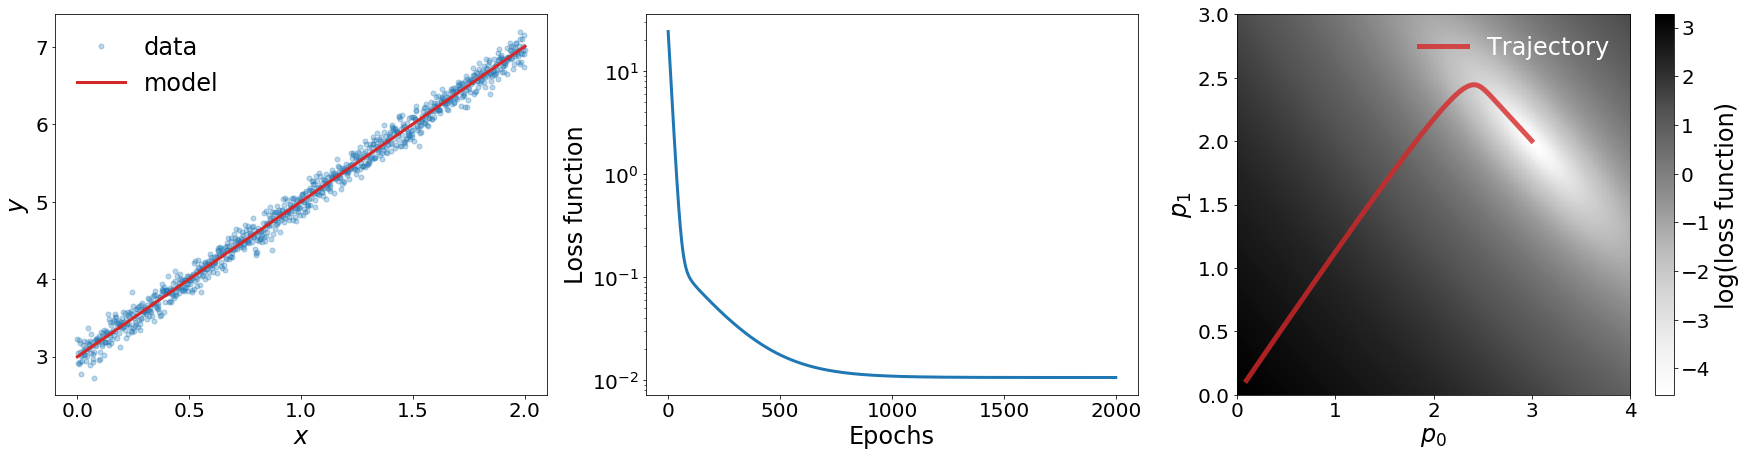

In [644]:
parameters = python_linear_descent(x, y, mu=0.01, N_epochs=2000)
plot_model(parameters)

### Numpy implementation

The numpy implementation makes a full use of the vecorization feature discussed several time in this chapter, but also broadcasting. This lead to a significantly clearer piece of code and also much faster. We can note in particular the different syntax used to update the model parameters.

In [632]:
def numpy_linear_descent(x, y, mu, N_epochs):

    # To define the lost function
    n = x.shape[0]
    
    # Initialize predictions, errors, parameters and gradients.
    ym = np.zeros(n)
    para = np.zeros((N_epochs, 2))
    pm, grad = np.zeros(2), np.zeros(2)
    
    # Looping over iterations (epochs)
    for i_epoch in range(0, N_epochs):
        delta = y-ym
        grad = -2/n * np.array([np.sum(delta), np.sum(delta*x)])
        pm = pm - mu*grad
        ym = model(x, pm[0], pm[1])
        
        # Save all parameters
        para[i_epoch] = pm
    
    return para

%timeit numpy_linear_descent(x, y, mu=0.01, N_epochs=2000)

37.3 ms ± 3.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


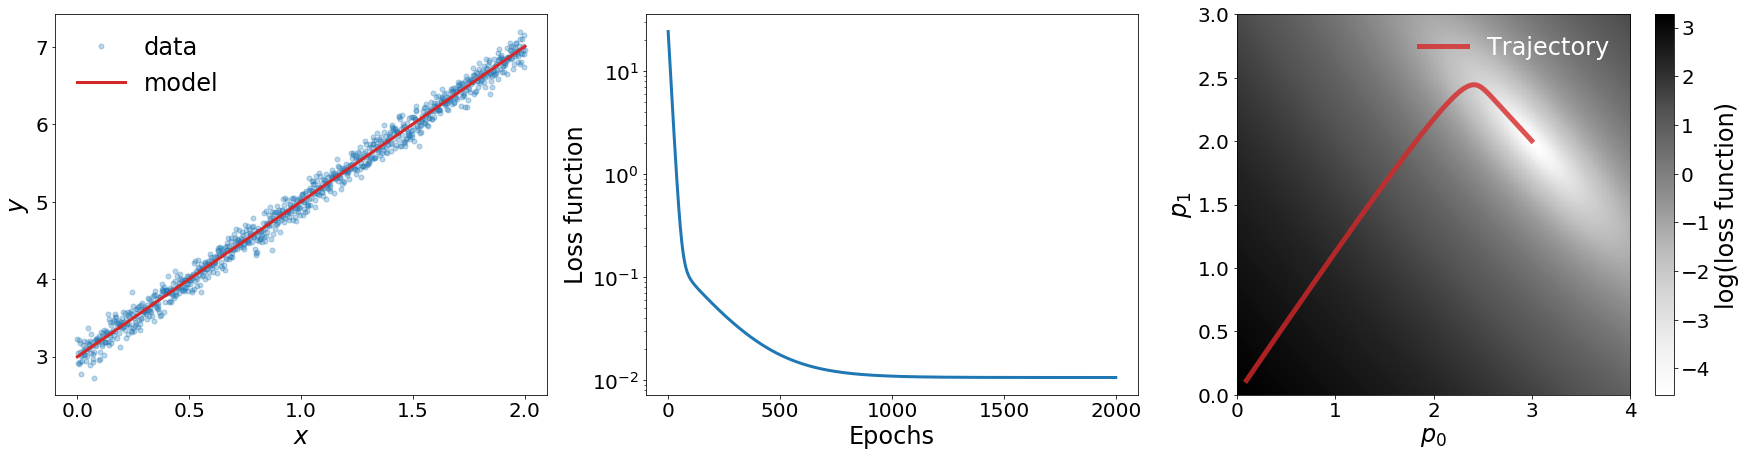

In [645]:
parameters = numpy_linear_descent(x, y, mu=0.01, N_epochs=2000)
plot_model(parameters)

We check that the result are indeed the same for an execution about 25 times faster ...